<a href="https://colab.research.google.com/github/AnshikaJaiswal28/Criminal-cases-Evaluation/blob/main/Criminal%20law%20cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#machine learning task

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/zephara /criminal_cases_dataset.csv')

# Calculate basic statistics
case_duration_stats = data['CaseDuration'].describe()
witness_count_stats = data['WitnessCount'].describe()

print("Case Duration Statistics:")
print(case_duration_stats)
print("\nWitness Count Statistics:")
print(witness_count_stats)


Case Duration Statistics:
count    100.000000
mean     180.990000
std       99.835268
min       10.000000
25%       94.250000
50%      176.500000
75%      266.000000
max      360.000000
Name: CaseDuration, dtype: float64

Witness Count Statistics:
count    100.000000
mean       4.580000
std        2.954811
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max        9.000000
Name: WitnessCount, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.58      0.64      0.61        11

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Neural Network (Multi-Layer Perceptron)
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print the results
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

# Additional evaluation metrics for each model
print("\nDecision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, gb_pred))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Decision Tree Classifier Accuracy: 0.7
Random Forest Classifier Accuracy: 0.6
Support Vector Machine Accuracy: 0.5
Gradient Boosting Classifier Accuracy: 0.7
Neural Network Accuracy: 0.55

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.67      0.91      0.77        11

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20


Support Vector Machine Classification Report:
             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
'''
#The best kind of model to use here is Decision Tree Classifier.
#To check for and mitigate bias in the CrimeType column, we can take the following 4 1)steps:

1)Check for Bias:

-Analyze the distribution of CrimeType values in the dataset. Look for any significant imbalances where certain types of crimes are overrepresented or underrepresented.
-Check if there are any correlations between CrimeType and other variables in the dataset. Biases may arise if certain types of crimes are more likely to occur in specific circumstances.

2)Mitigate Bias:

-Data Augmentation: If certain crime types are underrepresented, we can augment the dataset by generating synthetic samples for these types.

-Resampling Techniques: Use resampling techniques such as oversampling (for minority classes) or undersampling (for majority classes) to balance the dataset.

-Stratified Sampling: Ensure that stratified sampling is used when splitting the dataset into training and test sets to maintain the distribution of CrimeType values in both sets.

-Weighted Loss Function: In the model training phase, use a weighted loss function to penalize misclassifications of minority classes more heavily.

-Feature Engineering: Create new features that capture additional information about the crimes, which may help the model distinguish between different types more effectively.

3)Evaluate Model Performance:

After applying these mitigation strategies, retrain our model and evaluate its performance to see if bias has been reduced without significantly impacting the overall performance.

4)Monitor and Iterate:

Continuously monitor the performance of our model and be prepared to iterate on our mitigation strategies as needed, especially if new data reveals ongoing bias issues.'''


'\n#The best kind of model to use here is Decision Tree Classifier. \n#To check for and mitigate bias in the CrimeType column, you can take the following steps:\n\nCheck for Bias:\n\nAnalyze the distribution of CrimeType values in the dataset. Look for any significant imbalances where certain types of crimes are overrepresented or underrepresented.\nCheck if there are any correlations between CrimeType and other variables in the dataset. Biases may arise if certain types of crimes are more likely to occur in specific circumstances.\nMitigate Bias:\n\nData Augmentation: If certain crime types are underrepresented, you can augment the dataset by generating synthetic samples for these types.\nResampling Techniques: Use resampling techniques such as oversampling (for minority classes) or undersampling (for majority classes) to balance the dataset.\nStratified Sampling: Ensure that stratified sampling is used when splitting the dataset into training and test sets to maintain the distributio

In [ ]:
#Data analysis task
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/zephara /criminal_law_cases_dataset.csv")

In [ ]:
# Data Cleaning
# Remove duplicate case entries based on CaseID
df.drop_duplicates(subset="CaseID", inplace=True)

# Ensure all CaseDate and ReformDate entries are in a consistent date format
df["CaseDate"] = pd.to_datetime(df["CaseDate"], errors="coerce")
df["ReformDate"] = pd.to_datetime(df["ReformDate"], errors="coerce")

# Handling missing values
# For simplicity, let's drop rows with missing values
df.dropna(inplace=True)

df.head(20)

,CaseID,CrimeType,CaseDate,Verdict,ReformID,ReformDate
0,43374,Theft,2010-07-21,Not Guilty,807,2010-06-28
1,17788,Drug-related,2010-07-21,Not Guilty,695,2010-01-06
2,24281,Drug-related,2010-08-22,Not Guilty,576,2010-09-12
3,19774,Theft,2010-09-20,Guilty,189,2010-11-20
4,78219,Drug-related,2010-01-20,Guilty,818,2010-01-20
5,49366,Assault,2010-12-26,Guilty,273,2010-10-05
6,70857,Assault,2010-12-18,Not Guilty,806,2010-05-14
7,35785,Drug-related,2010-08-05,Not Guilty,802,2010-05-18
8,66818,Assault,2010-08-03,Not Guilty,685,2010-11-24
9,44330,Fraud,2010-07-13,Not Guilty,454,2010-11-20


In [ ]:
# Calculate the total number of cases per year
df["Year"] = df["CaseDate"].dt.year
cases_per_year = df.groupby("Year").size()

# Identify the most common type of crime per year
most_common_crime_per_year = df.groupby("Year")["CrimeType"].agg(lambda x: x.value_counts().index[0])

df["BeforeReform"] = df["CaseDate"] < df["ReformDate"]

guilty_before_reform = df[df["BeforeReform"]]["Verdict"].value_counts().get("Guilty", 0)
guilty_after_reform = df[~df["BeforeReform"]]["Verdict"].value_counts().get("Guilty", 0)

df.head(10)




,CaseID,CrimeType,CaseDate,Verdict,ReformID,ReformDate,Year,BeforeReform
0,43374,Theft,2010-07-21,Not Guilty,807,2010-06-28,2010,False
1,17788,Drug-related,2010-07-21,Not Guilty,695,2010-01-06,2010,False
2,24281,Drug-related,2010-08-22,Not Guilty,576,2010-09-12,2010,True
3,19774,Theft,2010-09-20,Guilty,189,2010-11-20,2010,True
4,78219,Drug-related,2010-01-20,Guilty,818,2010-01-20,2010,False
5,49366,Assault,2010-12-26,Guilty,273,2010-10-05,2010,False
6,70857,Assault,2010-12-18,Not Guilty,806,2010-05-14,2010,False
7,35785,Drug-related,2010-08-05,Not Guilty,802,2010-05-18,2010,False
8,66818,Assault,2010-08-03,Not Guilty,685,2010-11-24,2010,True
9,44330,Fraud,2010-07-13,Not Guilty,454,2010-11-20,2010,True


In [ ]:
print(cases_per_year)
print(guilty_before_reform)
print(guilty_after_reform)
print(most_common_crime_per_year)

Year
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    49
2020    50
dtype: int64
131
132
Year
2010         Assault
2011           Fraud
2012    Drug-related
2013           Fraud
2014           Fraud
2015           Theft
2016         Assault
2017           Fraud
2018           Theft
2019           Theft
2020           Theft
Name: CrimeType, dtype: object


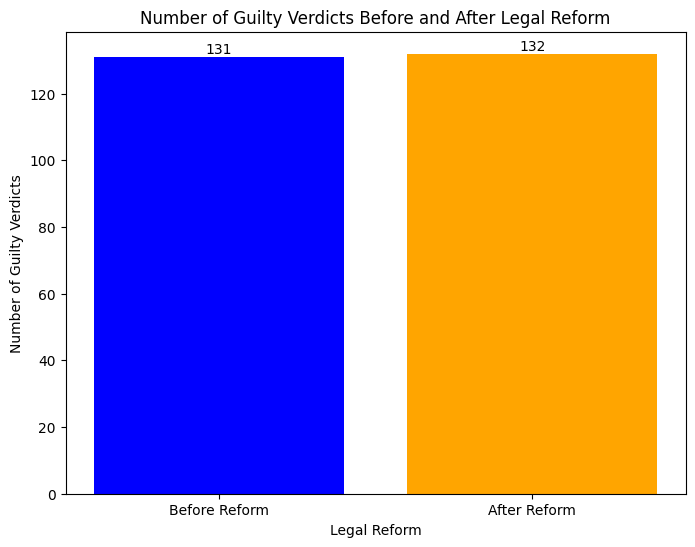

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(["Before Reform", "After Reform"], [guilty_before_reform, guilty_after_reform], color=['blue', 'orange'])
plt.xlabel("Legal Reform")
plt.ylabel("Number of Guilty Verdicts")
plt.title("Number of Guilty Verdicts Before and After Legal Reform")

# Add the number of cases on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()

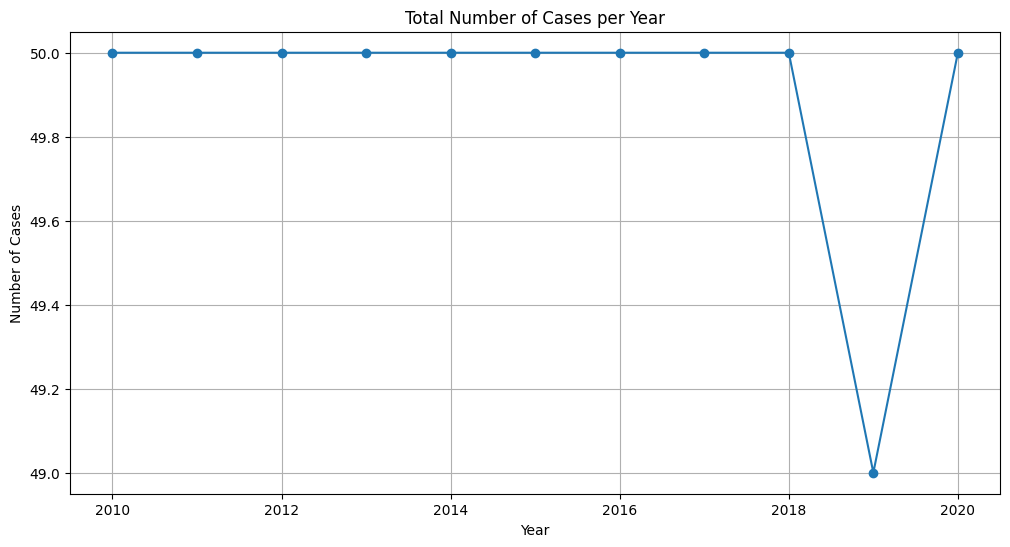

In [ ]:
# Visualization (using matplotlib)
import matplotlib.pyplot as plt

# Create a line chart showing the trend in the total number of cases per year
plt.figure(figsize=(12, 6))
plt.plot(cases_per_year.index, cases_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Total Number of Cases per Year")
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

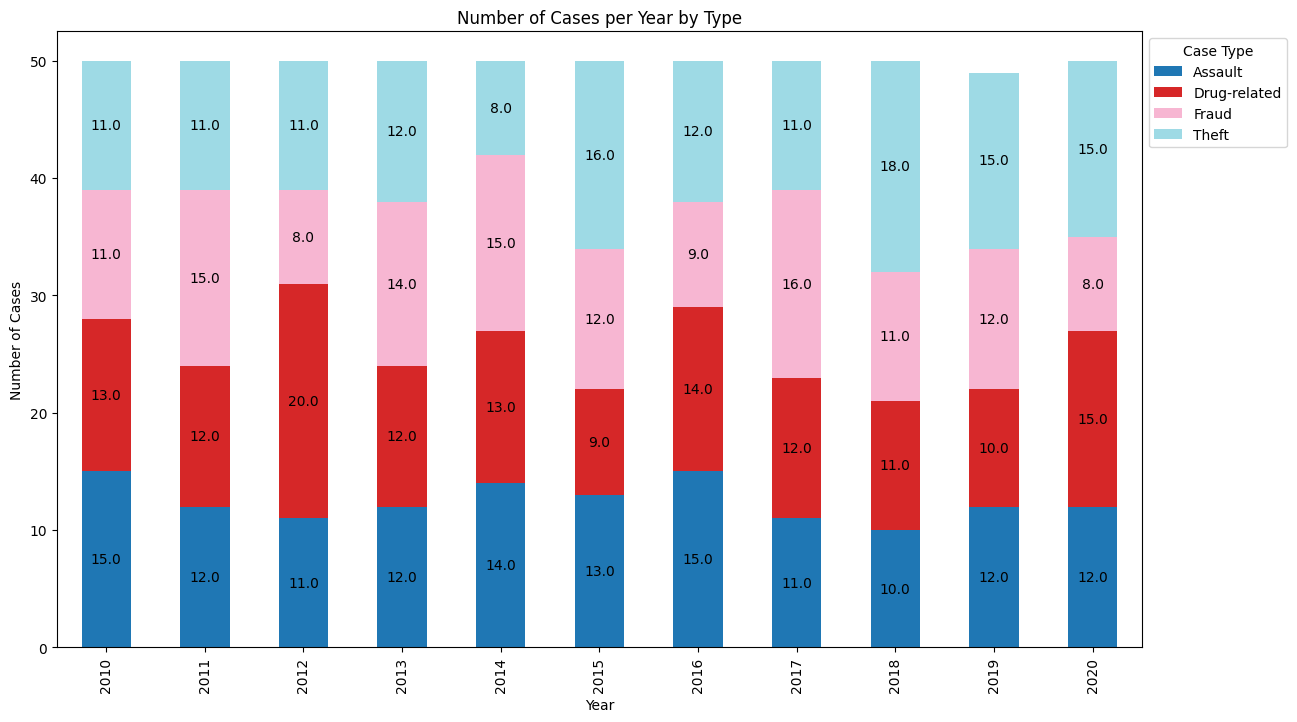

In [ ]:
# Calculate the number of each type of case per year
cases_per_year = df.groupby(["Year", "CrimeType"]).size().unstack(fill_value=0)

# Create a stacked bar chart with annotations
plt.figure(figsize=(14, 8))
bars = cases_per_year.plot(kind="bar", stacked=True, colormap="tab20", figsize=(14, 8))
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Number of Cases per Year by Type")
plt.legend(title="Case Type", bbox_to_anchor=(1, 1), loc='upper left')

# Add annotations to each sub-bar
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    bars.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

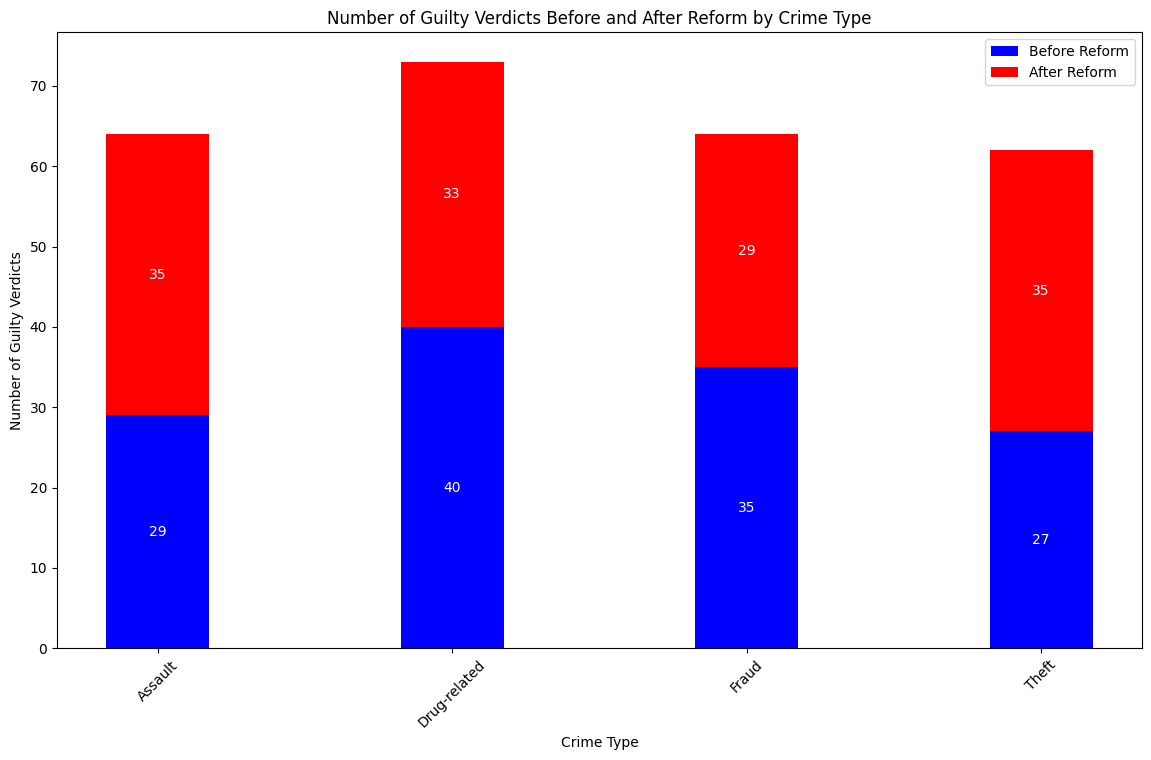

In [ ]:
# Calculate the number of guilty verdicts before and after each reform for each crime type
guilty_before_reform = df[df["BeforeReform"] & (df["Verdict"] == "Guilty")].groupby(["CrimeType", "Year"]).size().unstack(fill_value=0)
guilty_after_reform = df[~df["BeforeReform"] & (df["Verdict"] == "Guilty")].groupby(["CrimeType", "Year"]).size().unstack(fill_value=0)


# Create a bar chart
plt.figure(figsize=(14, 8))
width = 0.35
ind = range(len(guilty_before_reform.index))
p1 = plt.bar(ind, guilty_before_reform.sum(axis=1), width, label='Before Reform', color='b')
p2 = plt.bar(ind, guilty_after_reform.sum(axis=1), width, label='After Reform', color='r', bottom=guilty_before_reform.sum(axis=1))

# Add annotations
for i, (before, after) in enumerate(zip(guilty_before_reform.sum(axis=1), guilty_after_reform.sum(axis=1))):
    plt.text(i, before/2, str(before), ha='center', va='center', color='white')
    plt.text(i, before + after/2, str(after), ha='center', va='center', color='white')

plt.xlabel("Crime Type")
plt.ylabel("Number of Guilty Verdicts")
plt.title("Number of Guilty Verdicts Before and After Reform by Crime Type")
plt.xticks(ind, guilty_before_reform.index, rotation=45)
plt.legend()
plt.show()

Most common crime types in all years in descending order:
Drug-related    141
Theft           140
Assault         137
Fraud           131
Name: CrimeType, dtype: int64


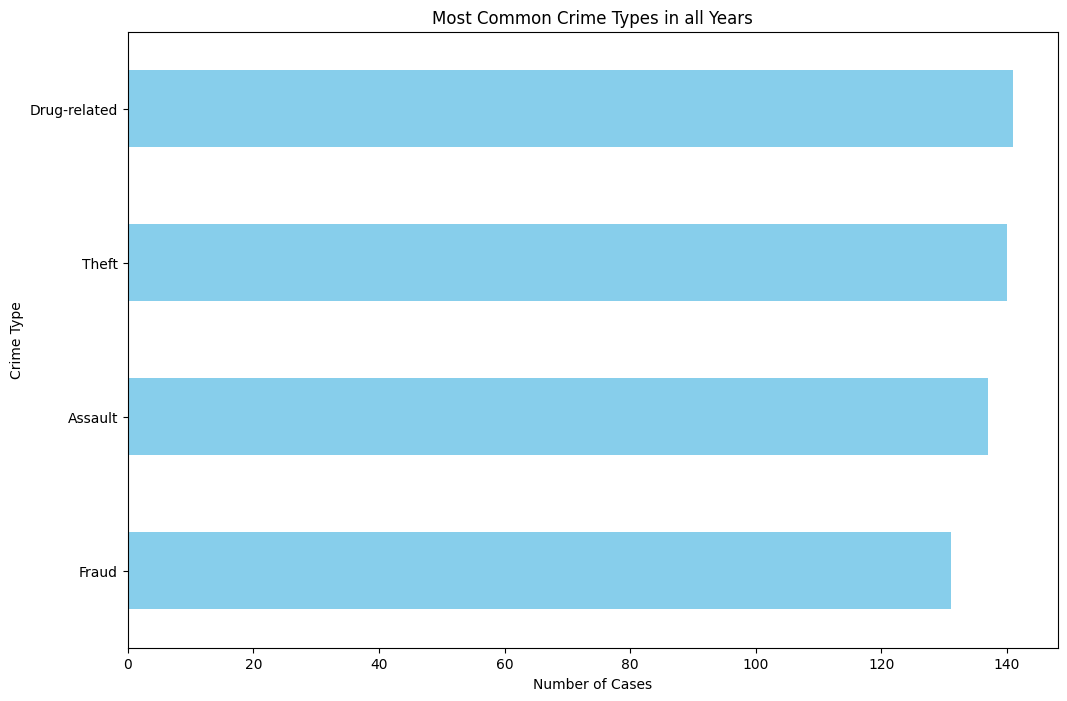

In [ ]:
# Calculate the most common crime types in all years (not year-wise) in descending order
most_common_crimes = df["CrimeType"].value_counts().sort_values(ascending=False)
print("Most common crime types in all years in descending order:")
print(most_common_crimes)



# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
most_common_crimes.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.title('Most Common Crime Types in all Years')
plt.gca().invert_yaxis()  # Reverse the order of crime types
plt.show()

